In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
import numpy as np
print(np.__version__)


2.2.6


In [3]:
df = pd.read_csv(r"D:\krish_naik_data_science_course\ML_project_1\student_performance_data\StudentsPerformance.csv")

In [4]:
df.shape

(1000, 8)

2. check for missing values in the dataset

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#check for duplicates
df.duplicated().sum()
#code to drop duplicates
#df.drop_duplicates(inplace=True)

np.int64(0)

In [7]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
#exploring categorical columns
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(f"categorical_featires={categorical_features} numerical_features={numerical_features}")

categorical_featires=Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object') numerical_features=Index(['math score', 'reading score', 'writing score'], dtype='object')


In [11]:
for col in categorical_features:
    print(f"Categories in {col}: {df[col].unique()}/n")


Categories in gender: ['female' 'male']/n
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']/n
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']/n
Categories in lunch: ['standard' 'free/reduced']/n
Categories in test preparation course: ['none' 'completed']/n


In [12]:
#adding columns for total score and average score
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
#number of student who got full_score in math, reading and writing
full_score_math = df[df['math score'] == 100].shape[0]
print(f"Number of students who got full score in math: {full_score_math}")

full_score_reading = df[df['reading score'] == 100].shape[0]
print(f"Number of students who got full score in reading: {full_score_reading}")    

full_score_writing = df[df['writing score'] == 100].shape[0]
print(f"Number of students who got full score in writing: {full_score_writing}")

Number of students who got full score in math: 7
Number of students who got full score in reading: 17
Number of students who got full score in writing: 14


In [15]:
#number of students who got less than 20 in math, reading and writing
less_than_20_math = df[df['math score'] < 20].shape[0]
print(f"Number of students who got less than 20 in math: {less_than_20_math}")

less_than_20_reading = df[df['reading score'] < 20].shape[0]
print(f"Number of students who got less than 20 in reading: {less_than_20_reading}")

less_than_20_writing = df[df['writing score'] < 20].shape[0]
print(f"Number of students who got less than 20 in writing: {less_than_20_writing}")

Number of students who got less than 20 in math: 4
Number of students who got less than 20 in reading: 1
Number of students who got less than 20 in writing: 3


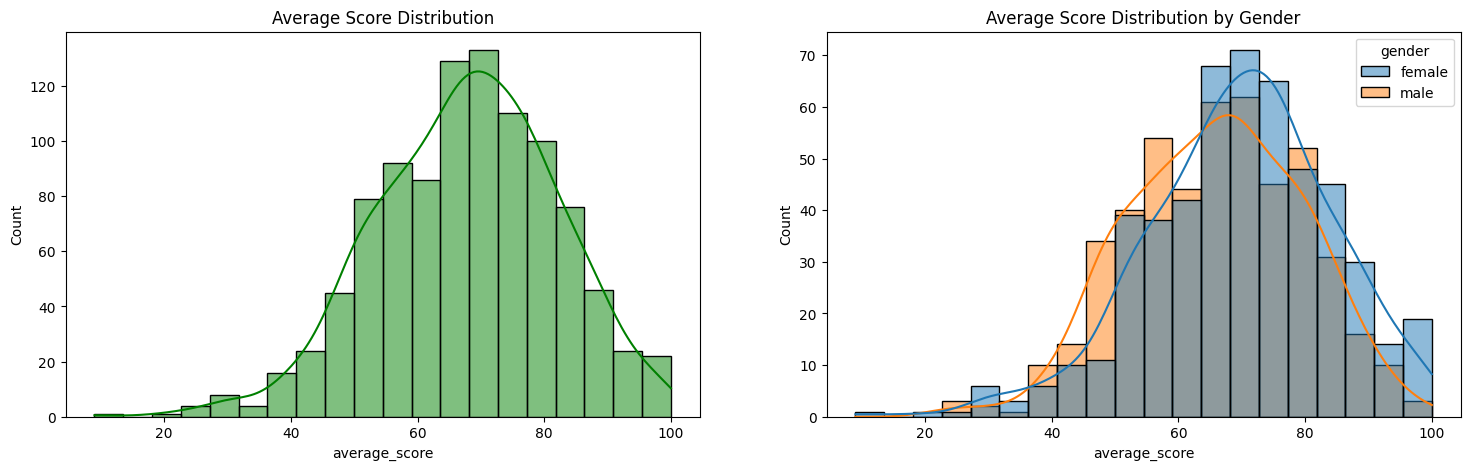

In [17]:
# exploring data (visualizations)
# visualize average score distribution

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=20, kde=True, color='g')
plt.title("Average Score Distribution")

plt.subplot(122)
sns.histplot(data=df, x='average_score', bins=20, kde=True, hue='gender')
plt.title("Average Score Distribution by Gender")

plt.show()


Female students perform relatively better compared to male students.